In [26]:
%matplotlib inline
from matplotlib import pyplot as plt
from scipy.integrate import solve_ivp # for reference
import autograd.numpy.random as npr

import autograd.numpy as np
from neuralsolver import NNSolver

import seaborn as sns
from sklearn.metrics import mean_squared_error
from math import sqrt
import time

# figure settings
plt.rcParams["figure.figsize"] = (8,6)
plt.rcParams['legend.fontsize'] = 13

plt.rcParams['xtick.labelsize'] = 13
plt.rcParams['ytick.labelsize'] = 13

plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 15

# 3-species LV

In [2]:
# define ODE problem
# Lotka–Volterra equations

def f(t, y):
    # du/dt = au -buv
    # dv/dt = -cv + dbu*v
    # http://scipy-cookbook.readthedocs.io/items/LoktaVolterraTutorial.html
    a = 1.
    b = 1
    c = 1
    d = 1
    e = 1
    f = 1
    g = 1
    
    X = y[0]
    Y = y[1]
    Z = y[2]
    
    return [a*X - b*X*Y, -c*Y + d*X*Y - e*Y*Z, -f*Z+ g*Y*Z ]

t = np.linspace(0, 5, 100).reshape(-1, 1) #increase training points

y0_list = [0.5, 1,  2] # number of prey and predactor respectively

## Reference Solution from ODE Solver

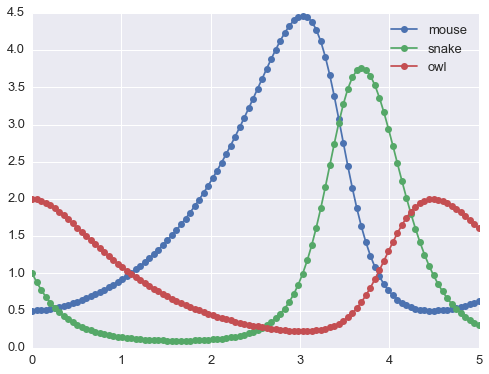

In [3]:
# reference solution using scipy package
sol = solve_ivp(f, [t.min(), t.max()], y0_list, 
                t_eval=t.ravel(), method='Radau', rtol=1e-5)
plt.plot(sol.t, sol.y[0], marker='o', label='mouse')
plt.plot(sol.t, sol.y[1], marker='o', label='snake')
plt.plot(sol.t, sol.y[2], marker = 'o', label = 'owl')
plt.legend()

In [22]:
nn = NNSolver(f, t, y0_list, n_hidden=50)
nn.reset_weights()

In [23]:
nn.train(maxiter=500, iprint=100)

y_pred_list, dydt_pred_list = nn.predict()

iteration: 0 loss:  12324.3900672
iteration: 100 loss:  0.046859552334
iteration: 200 loss:  0.0303051551192
iteration: 300 loss:  0.0110763633587
iteration: 400 loss:  0.00778728085564
         Current function value: 0.006474
         Iterations: 500
         Function evaluations: 558
         Gradient evaluations: 558


(0, 5.1)

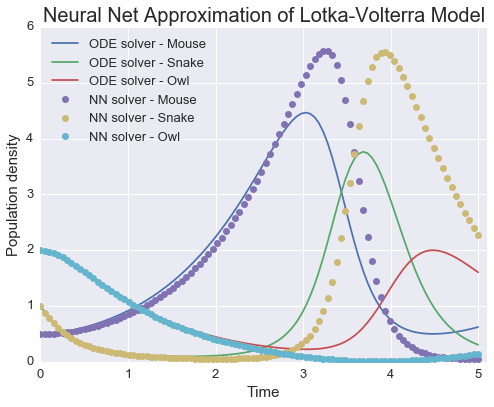

In [24]:
plt.figure(figsize= (8, 6))
# scipy sol
plt.plot(sol.t, sol.y[0], label='ODE solver - Mouse')
plt.plot(sol.t, sol.y[1], label='ODE solver - Snake')
plt.plot(sol.t, sol.y[2], label='ODE solver - Owl')

# nn soln
plt.plot(t, y_pred_list[0], 'o', label='NN solver - Mouse')
plt.plot(t, y_pred_list[1], 'o', label='NN solver - Snake')
plt.plot(t, y_pred_list[2], 'o', label='NN solver - Owl')

plt.legend(loc = "best")
plt.title('Neural Net Approximation of Lotka-Volterra Model')
plt.xlabel('Time')
plt.ylabel('Population density')
plt.xlim((0, 5.1))

## Average RMSE

In [25]:
np.mean([sqrt(mean_squared_error(sol.y[i], y_pred_list[i])) for i in range(3)])

0.92502677344908024

## Extrapolation

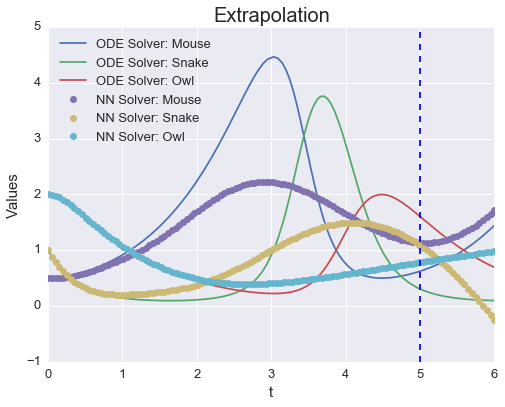

In [50]:
# not used
t_test = np.linspace(0., 6.0, 120).reshape(-1,1)

sol = solve_ivp(f, [t_test.min(), t_test.max()], y0_list, method='Radau', rtol=1e-5)
y_pred_list, dydt_pred_list = nn.predict(t=t_test)
plt.figure(figsize=(8, 6))
plt.plot(sol.t, sol.y[0], label='ODE Solver: Mouse')
plt.plot(sol.t, sol.y[1], label='ODE Solver: Snake')
plt.plot(sol.t, sol.y[2], label='ODE Solver: Owl')
plt.plot(t_test, y_pred_list[0], 'o', label='NN Solver: Mouse')
plt.plot(t_test, y_pred_list[1], 'o', label='NN Solver: Snake')
plt.plot(t_test, y_pred_list[2], 'o', label='NN Solver: Owl')
plt.axvline(x = 5 , linestyle = '--')
plt.legend(loc = 'best')
plt.title('Extrapolation')
plt.ylabel('Values')
plt.xlabel('t')

# Performance over 100 Fittings

In [125]:
res_arr = []
for _ in range(100):
    nn = NNSolver(f, t, y0_list, n_hidden=20)
    nn.reset_weights()
    nn.train(maxiter=500)
    y_pred_list, dydt_pred_list = nn.predict()
    res_arr.append(np.mean([sqrt(mean_squared_error(sol.y[i], y_pred_list[i])) for i in range(3)]))

iteration: 0 loss:  35289.1682894
iteration: 200 loss:  0.0308851016104
iteration: 400 loss:  0.0017501158069
         Current function value: 0.000305
         Iterations: 500
         Function evaluations: 557
         Gradient evaluations: 557
iteration: 0 loss:  288866.678576
iteration: 200 loss:  0.0249339701187
iteration: 400 loss:  0.0188742398327
         Current function value: 0.011041
         Iterations: 500
         Function evaluations: 572
         Gradient evaluations: 572
iteration: 0 loss:  7383.64099153
iteration: 200 loss:  0.0274415735462
iteration: 400 loss:  0.0207630144468
         Current function value: 0.020340
         Iterations: 500
         Function evaluations: 552
         Gradient evaluations: 552
iteration: 0 loss:  19.0399883033
iteration: 200 loss:  0.0246584853157
iteration: 400 loss:  0.0152530703286
         Current function value: 0.005901
         Iterations: 500
         Function evaluations: 545
         Gradient evaluations: 545
iteration: 0

(array([ 33.,   4.,  37.,  24.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   1.]), array([ 0.76567321,  0.98891039,  1.21214757,  1.43538475,  1.65862193,
        1.88185911,  2.10509629,  2.32833347,  2.55157065,  2.77480783,
        2.99804501,  3.22128219,  3.44451937,  3.66775655,  3.89099373,
        4.11423091,  4.33746809,  4.56070527,  4.78394245,  5.00717963,
        5.23041681,  5.45365399,  5.67689117,  5.90012835,  6.12336553,
        6.34660271,  6.56983989,  6.79307707,  7.01631425,  7.23955143,
        7.46278861,  7.68602579,  7.90926297,  8.13250015,  8.35573733,
        8.57897451,  8.80221169,  9.02544887,  9.24868605,  9.47192323,
        9.69516041]), <a list of 40 Patch objects>)


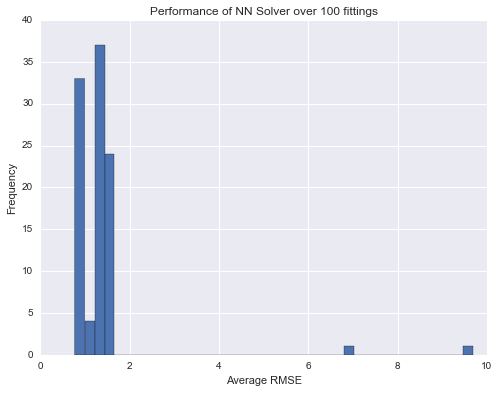

In [127]:
# the following plot doesn't seem to mean much
# given the fitting was bad to start with
plt.figure(figsize= (8, 6))
figr = plt.hist(res_arr, bins=40)
plt.title('Performance of NN Solver over 100 fittings')
plt.xlabel('Average RMSE')
plt.ylabel('Frequency')
print (figr)

## Compare across optimization techniques

In [27]:
def plot_loss_compare(model, maxiter = 1000, iprint = 200):
    model.reset_weights()
    save_init_paras_list = model.params_list
    save_init_flattened_params = model.flattened_params
    
    
    methods = ['CG','BFGS','L-BFGS-B']
    
    plt.figure(figsize=(8,6))
    for method in methods:
        
        model.params_list = save_init_paras_list
        model.flattened_params = save_init_flattened_params
        
        start_time = time.time()
        model.train(method = method, maxiter=maxiter, iprint=iprint)
        duration = time.time() - start_time
        
        plt.semilogy(range(len(model.loss)), model.loss, label = method + ' (time = {}s'.format(round(duration,2)) + ')')
        
    plt.legend()
    plt.title("Log Loss Comparision", fontsize = 20)
    plt.xlabel("Iteration")
    plt.ylabel("Log Loss")
    plt.show()

iteration: 0 loss:  4312.49731836
iteration: 200 loss:  0.0696601642583
iteration: 400 loss:  0.0619901530199
iteration: 600 loss:  0.0590199907826
iteration: 800 loss:  0.0579562412069
         Current function value: 0.056723
         Iterations: 1000
         Function evaluations: 1862
         Gradient evaluations: 1862
iteration: 0 loss:  4312.49731836
iteration: 200 loss:  0.0273238808787
iteration: 400 loss:  0.00802475324412
iteration: 600 loss:  0.00563870997173
iteration: 800 loss:  0.00476765034521
         Current function value: 0.003677
         Iterations: 1000
         Function evaluations: 1110
         Gradient evaluations: 1110
iteration: 0 loss:  4753.41081372
iteration: 200 loss:  0.0622829825294
iteration: 400 loss:  0.0569577425934
iteration: 600 loss:  0.0554186581298
iteration: 800 loss:  0.0545401878956
iteration: 1000 loss:  0.0542479533419


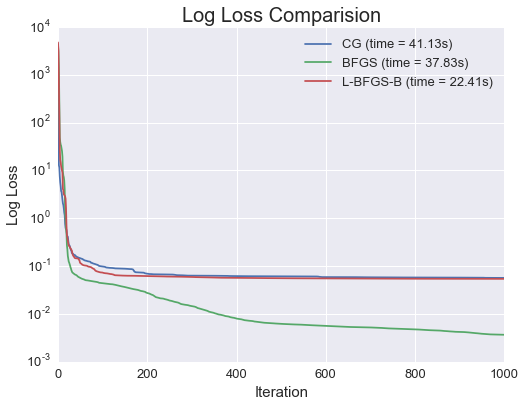

In [28]:
plot_loss_compare(nn)